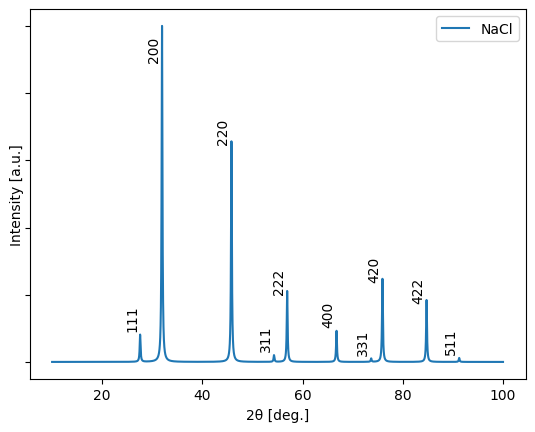

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pylab

def calc_asf(p, theta): # Atomic scattering factor
    a = [p[0], p[2], p[4], p[6], p[8]]
    b = [p[1], p[3], p[5], p[7], p[9]]
    c = p[10]
    sum_ = 0.0
    for i in range(5):
        sum_ = sum_+ a[i]*math.exp(-1.0*b[i]*math.sin(theta/180.0*pi)**2.0/wvl**2.0)
    return sum_+c

def calc_peaks(num, tth_min, tth_max):
    peak_list = []
    for h in range(-num, num+1):
        for k in range(-num, num+1):
            for l in range(-num, num+1):
                extinction_ch = h%2+k%2+l%2 # Extinction rule
                if extinction_ch != 0 and extinction_ch != 3:
                    continue
                try:
                    tth = 2*math.asin((h**2+k**2+l**2)**0.5*wvl/lc/2)*180/pi
                    if tth_min<=tth<=tth_max:
                        peak_list.append([h, k, l, tth])
                except:
                    pass
    return peak_list

def calc_F(h, k, l, tth):
    F_R, F_I = 0, 0
    for posi in posi_list:
        x, y, z, atom = posi
        asf = calc_asf(dic_asf[atom], tth/2)
        p0 = 2*pi*(h*x+k*y+l*z)
        F_R += math.cos(p0)*asf
        F_I += math.sin(p0)*asf
    return 2*F_R, F_I

def calc_LP(theta): #Lorentz-polarization factor
    p1=math.cos(2.0*theta/180.0*pi)
    p2=math.sin(theta/180.0*pi)
    p3=math.cos(theta/180.0*pi)
    return (1.0+p1**2.0)/p2**2.0/p3

def calc_Intensity(peak_list):
    dic_Intensity = {} # {Two theta: [Intensity, [h, k, l]]}
    for __ in peak_list:
        h, k, l, tth = __
        F_R, F_I = calc_F(h, k, l, tth)
        LP = calc_LP(tth/2.0)
        Intensity = (F_R**2.0+F_I**2.0)*LP
        try:
            dic_Intensity[tth][0] += Intensity
        except:
            dic_Intensity[tth] = [Intensity, [h, k, l]]
    return dic_Intensity

def Lorenz(p, x): #Lorenzian
    return ((p[0]*p[1]**2/((x-p[2])**2+p[1]**2)))

pi = np.pi
lc = 5.6
wvl = 1.54059

tth_min = 10.0
tth_max = 100.0
tth_step = 0.01


posi_list = [[0.5, 0.5, 0.5, 'Na'],\
             [0.5, 0.0, 0.0, 'Na'],\
             [0.0, 0.5, 0.0, 'Na'],\
             [0.0, 0.0, 0.5, 'Na'],\
             [0.0, 0.0, 0.0, 'Cl'],\
             [0.5, 0.5, 0.0, 'Cl'],\
             [0.5, 0.0, 0.5, 'Cl'],\
             [0.0, 0.5, 0.5, 'Cl'],\
             ]


dic_asf = {}
dic_asf['Na'] = [4.910127, 3.281434, 3.081783, 9.119178, 1.262067, 0.102763, 1.098938, 132.013942, 0.560991, 0.405878, 0.079712]
dic_asf['Cl'] = [1.446071, 0.052357, 6.870609, 1.193165, 6.151801, 18.343416, 1.750347, 46.398394, 0.634168, 0.4010051, 0.146773]

peaks = calc_peaks(5, tth_min, tth_max)
dic_Intensity = calc_Intensity(peaks)

len_pattern = int((tth_max-tth_min)/tth_step)

vector=np.array([0.0]*len_pattern)
tths = np.arange(tth_min, tth_max, tth_step)
for tth in dic_Intensity:
  vector += Lorenz([dic_Intensity[tth][0], 0.1, tth], tths)
vector = vector/np.max(vector)

fig, ax = plt.subplots()
ax.tick_params(labelleft=False)
plt.plot(tths, vector, label="NaCl", zorder=1)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.xlabel('2θ [deg.]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
for tth in dic_Intensity:
  key = int((round(tth,2)-10)*100)
  x = tth-3
  y = vector[key]
  if y>=1.0:
    y = vector[key]-0.1
  elif y<+0.1:
    y = vector[key]+0.02
  hkl = str(abs(dic_Intensity[tth][1][0]))+str(abs(dic_Intensity[tth][1][1]))+str(abs(dic_Intensity[tth][1][2]))
  plt.text(x, y, hkl, rotation=90)
  # print((x, y, hkl))
plt.show()


In [2]:
import sys
import numpy as np

PI = np.pi
SIN = np.sqrt(3)/2.0
CONST1 = 2/np.sqrt(6)
CONST2 = 1/np.sqrt(2)

#### 逆格子空間での射影

In [3]:
def prjctn_recipro_par(r,a=1.0,c=1.0):
    """
    parallel component of 5D reciprocal lattice vector
    input
    list:r, 5D reflection index
    float:a, lattice constant
    float:c, lattice constant
    """
    x = (1*r[0]+SIN*r[1]+0.5*r[2]       )/a*CONST2
    y = (       0.5*r[1]+SIN*r[2]+1*r[3])/a*CONST2
    z = r[4]/c
    return [x,y,z]

def prjctn_recipro_perp(r,a=1.0):
    """
    perpendicular component of 5D reciprocal lattice vector
    input
    list:r, 4D reflection index
    float:a, lattice constant
    """
    x=(1*r[0]-SIN*r[1]+0.5*r[2]     )/a*CONST2
    y=(       0.5*r[1]-SIN*r[2]+r[3])/a*CONST2
    return [x,y]


In [4]:
def prjctn_recipro_par_length(r,a=1.0,c=1.0):
    [x,y,z]=prjctn_recipro_par(r,a,c)
    return np.sqrt(x**2+y**2+z**2)

def prjctn_recipro_perp_length(r,a=1.0):
    [x,y]=prjctn_recipro_perp(r,a)
    return np.sqrt(x**2+y**2)


#### 実空間での射影

In [5]:
def prjctn_direct_par_length(r,a=1.0,c=1.0):
    [x,y,z]=prjctn_direct_par(r,a,c)
    return np.sqrt(x**2+y**2+z**2)

def prjctn_direct_perp_length(r,a=1.0):
    [x,y]=prjctn_direct_perp(r,a)
    return np.sqrt(x**2+y**2)


In [6]:
def prjctn_direct_par(r,a=1.0,c=1.0):
    """
    parallel component of 5D reciprocal lattice vector
    input
    list:r, 5D reflection index
    float:a, lattice constant
    float:c, lattice constant
    """
    x = ( SIN*r[0]+r[1]     -0.5*r[3])*a*CONST1
    y = (-0.5*r[0]     +r[2]+SIN*r[3])*a*CONST1
    z = r[4]*c
    return [x,y,z]

def prjctn_direct_perp(r,a=1.0):
    """
    perpendicular component of 5D reciprocal lattice vector
    input
    list:r, 5D reflection index
    float:a, lattice constant
    """
    x = (-SIN*r[0]+r[1]-0.5*r[3])*a*CONST1
    y = (-0.5*r[0]+r[2]-SIN*r[3])*a*CONST1
    return [x,y]


#### 回折角

In [7]:
def reflection_angle(wvl,hklmno,a,c):
    """
    return theta-angle in rad.
    """
    qpar = prjctn_recipro_par_length(hklmno,a,c)
    theta = np.arcsin(qpar*wvl/2)
    return theta


#### フーリエ変換

In [8]:
import math
from scipy import integrate
import cmath

In [9]:
PI = np.pi
TWOPI = 2.0*PI

In [10]:
def calc_FT(hkl,xyz):
    """
    格子のフーリエ変換の計算
    see
    Yamamoto, qcdiff, qcdiff1.f90, L.1789, subroutine stfcd(h,f,fn,dfdxx,q,ny,dfdbia)

    input:

    :param array hkl:
    :param array xyz:
    """
    val = 0.0+0.0*1j
    #print('  hkl = ',hkl)
    #print('  xyz = ',xyz)
    if xyz.ndim == 1:
        con1 = np.dot(hkl,xyz)
        #print('  con1 = ',con1)
        val = cmath.exp(TWOPI*con1*1j)
    elif xyz.ndim == 2:
        for i in range(len(xyz)):
            con1 = np.dot(hkl,xyz[i])
            val += cmath.exp(TWOPI*con1*1j)
    else:
        print('check your model')
    return val

In [11]:
def calc_od_FT(shape,obj,hkl,position,site_symmetry,flag=0,ad=1.0,scl=1.0,eps=1E-3):
    """This returns Fourier integral of an occupation domain.

    Parameters
    ----------
    shape: str
        shape of the occupation domain.
    obj: list
        occupation domain(set of triangle)
    hkl: list
        reflection index
    position: ndarray
        centre position of the od
    site_symmetry: list
        index of symmetry operation of the site symmetry
    flag: int
        (0) the model is centre symmetric
        (1) the model is not centre symmetric
    ad: float
        dodecagonal lattica constant
    scl: float
        scale
    eps: float

    Returns
    -------
    """
    if shape == 'triangle':
        if site_symmetry==[-1]: # symmetric ODs
            od=obj
        else: # asymmetric unit of ODs
            od=generator_obj_symmetric_obj_specific_symop(obj,position,site_symmetry)
            #n1,n2,n3,n4,n5=od.shape
            #od=od.reshape(n1*n2,n3,n4,n5)
        return fpoly(od,hkl,flag,ad,scl,eps)

    else:
        print('OD shape error')
        return

In [12]:
def fpoly(od,hkl,flag,ad,scl,eps):
    """This function returns Fourier integral of an indipendent occupation domain (multi-triangles)

    Parameters
    ----------
    od: list
        occupation domain(set of triangle)
    hkl: list
        reflection index
    site: ndarray
        centre position of the od
    ad: float
        dodecagonal lattica constalt
    scl: float
        scale
    flag: int
        (0) od
        (1) inversion of od is used for calculation
    eps: float

    Returns
    -------
    """
    out=0.0+0.0*1j
    for triangle in od:
        e1=triangle[1]-triangle[0]
        e2=triangle[2]-triangle[0]
        e1 = prjctn_direct_perp(e1,ad)
        e2 = prjctn_direct_perp(e2,ad)
        out+=fourier2d_qcdiff_0(e1,e2,hkl,ad,scl,eps)
    if flag==0:
        return out
    else:
        # odに反転操作を行ったもののフーリエ変換は、odのフーリエ変換の共役になる。
        return out.conjugate()

In [13]:
def fourier2d_qcdiff_0(e1i,e2i,hkl,ad,scl,eps):
    """
    Fourier integral of a triangle defined by e1 and e2.
    Reference:
    Yamamoto, qcdiff, occupdom.f90, L.956, complex function fq0d(hr,e1,e2,v,rmax,dfqdr)

    input:

    :param vertex coordinates of the triangle, e1 and e2
    :param nd.array: hkl
    :param float: ad
    :param float: scl (= rmax, in qcdiff)
    :param float: eps
    """
    #projection onto the internal space of reflection indices
    qi = prjctn_recipro_perp(hkl,ad)
    qi = np.array(qi)

    #volume of the triangle
    vol = abs(np.cross(e1i,e2i))/2.0*scl**2

    q1 = TWOPI*np.dot(qi,e1i)*scl
    q2 = TWOPI*np.dot(qi,e2i)*scl
    q3 = q1-q2 # ここ重要：q2-q1ではない！

    cexp01 = cmath.exp(1j*q1)-1
    cexp02 = cmath.exp(1j*q2)-1
    cexp1 = cmath.exp(1j*q1)-1-1j*q1
    cexp2 = cmath.exp(1j*q2)-1-1j*q2
    dcq1dq = 1j*cmath.exp(1j*q1)-1j

    if abs(q1)<eps and abs(q2)<eps:
        val = vol/2.0
    elif abs(q1)<eps:
        val = -vol*cexp2/q2**2
    elif abs(q2)<eps:
        val = -vol*cexp1/q1**2
    elif abs(q3)<eps:
        val = vol*(cexp1/q1**2-dcq1dq/q1)
    else:
        val = vol*(q1*cexp02-q2*cexp01)/(q1*q2*q3)

    return val

#### ODの定義

In [14]:
od_B = []
tr1 = [[0,0,0,0,0],[0,1,0,0,0],[-1,0,0,0,0]]
tr2 = [[0,0,0,0,0],[-1,0,0,0,0],[0,0,0,-1,0]]
tr3 = [[0,0,0,0,0],[0,0,0,-1,0],[0,0,1,0,0]]
tr4 = [[0,0,0,0,0],[0,0,1,0,0],[0,-1,0,-1,0]]
tr5 = [[0,0,0,0,0],[0,-1,0,-1,0],[1,0,1,0,0]]
tr6 = [[0,0,0,0,0],[1,0,1,0,0],[0,-1,0,0,0]]
tr7 = [[0,0,0,0,0],[0,-1,0,0,0],[1,0,0,0,0]]
tr8 = [[0,0,0,0,0],[1,0,0,0,0],[0,0,0,1,0]]
tr9 = [[0,0,0,0,0],[0,0,0,1,0],[0,0,-1,0,0]]
tr10 = [[0,0,0,0,0],[0,0,-1,0,0],[0,1,0,1,0]]
tr11 = [[0,0,0,0,0],[0,1,0,1,0,],[-1,0,-1,0,0]]
tr12 = [[0,0,0,0,0],[-1,0,-1,0,0],[0,1,0,0,0]]

od_B = np.array([tr1,tr2,tr3,tr4,tr5,tr6,tr7,tr8,tr9,tr10,tr11,tr12])

#### 指数発生

In [15]:
EPS=1E-6

#### 原子散乱因子

In [16]:
import atom as at


In [17]:
def calc_asf(element, theta): # Atomic scattering factor
    p = at.aff_parameters[element]
    a = [p[0], p[2], p[4], p[6]]
    b = [p[1], p[3], p[5], p[7]]
    c = p[8]
    sum_ = 0.0
    for i in range(4):
        sum_ = sum_+ a[i]*math.exp(-1.0*b[i]*math.sin(theta/180.0*np.pi)**2.0/wvl**2.0)
    return sum_+c

#### ローレンツ因子

In [18]:
def calc_LP(theta): #Lorentz-polarization factor
    p1=math.cos(2.0*theta/180.0*np.pi)
    p2=math.sin(theta/180.0*np.pi)
    p3=math.cos(theta/180.0*np.pi)
    return (1.0+p1**2.0)/p2**2.0/p3

#### 温度因子

In [19]:
B_par = 1.519
B_perp = 54.00



In [20]:
def temfact(B_par,B_perp,g_par,g_perp):
    # for g in peaks_dict.values():
    return math.exp(-(B_par*g_par**2+B_perp*g_perp**2)/4)



#### ローレンツ関数畳み込み

In [21]:
def Lorenz(p, x): #Lorenzian
    return ((p[0]*p[1]**2/((x-p[2])**2+p[1]**2)))

In [22]:
def read_file(file):
    """
    read a file
    input: 
    :param file: file name of the imput.
    """
    try:
        f=open(file,'r')
    except IOError as e:
        print(e)
        sys.exit(0)
    line=[]
    while 1:
        a=f.readline()
        if not a:
            break
        line.append(a[:-1])
    return line

#### 指数ファイル取り込み

In [23]:
reflist = read_file("./reflection_list.ref")

In [24]:
peaks_dict = {}
for i in range(1,len(reflist)):
    b = reflist[i].split()
    hklmno = np.array([int(b[0]),int(b[1]),int(b[2]),int(b[3]),int(b[4])])
    multiplicity = int(b[5])
    g_par = float(b[6])
    g_perp = float(b[7])
    peaks_dict[i] = [hklmno,multiplicity,g_par,g_perp]


#### 構造因子の計算

In [25]:
import tqdm

def structure_factor(peaks_dict,a,c,wvl,myModel,elm_A,elm_B,flag,n1,n2):
    theta_list = []
    intensity_dict = {}
    for nref in peaks_dict:
        hklmno, multiplicity,g_par,g_perp = peaks_dict[nref]
        theta=reflection_angle(wvl,hklmno,a,c) # in rad.
        q_par_len=2*math.sin(theta)/wvl # in Ang*{-1}
        if theta>0. and theta<PI/2.0:
            position,shape,obj,site_symmetry = myModel
            xaxis = 2*theta/PI*180 # tth in degree
            xaxis = round(xaxis,3)
            pos_FT = calc_FT(hklmno,position)
            od_FT = calc_od_FT(shape,obj,hklmno,position,site_symmetry,flag=0,ad=1.0,scl=1.0,eps=1E-3)
                        
            asf1 = calc_asf(elm_A, xaxis)
            asf2 = calc_asf(elm_B, xaxis)

            q_per_len=prjctn_recipro_perp_length(hklmno)
            TF = temfact(B_par,B_perp,q_par_len,q_per_len)
            
            LP = calc_LP(xaxis)


            sfacs1 = pos_FT*od_FT*(n1/n1+n2)*asf1*TF
            sfacs2 = pos_FT*od_FT*(n2/n1+n2)*asf2*TF
            sfacs = sfacs1+sfacs2

            intensity = LP*multiplicity*(sfacs.real**2 + sfacs.imag**2)

            try:
                intensity_dict[xaxis][0] += intensity.real
            except:
                intensity_dict[xaxis] = [intensity.real, hklmno]
        else:
            pass
    return intensity_dict

In [26]:
import generator as gm

In [27]:
hmax=5
lmax=4

wvl_dic={} #X線の波長
wvl_dic['Cu_Ka'] = 1.54059 # in Ang.
wvl_dic['Mo_Ka'] = 0.71069 # in Ang.
wvl = wvl_dic['Cu_Ka']

qemax = 2/wvl # in Ang.^{-1}
qimax = 0.5

flag = 'unique'

__,__,__,symop_inv = gm.mattrix_dodeca_sym()

#五次元構造の情報
#五次元格子の各頂点に占有領域Aがある
position = np.array([0,0,0,0,0]) #占有領域od_Bの中心位置
position2 = np.dot(symop_inv,position)

#占有領域Aの定義
shape = 'triangle'
# obj_A = od_A
# obj_B = od_B
obj = od_B
site_symmetry = [-1]
myModel = [position,shape,obj,site_symmetry]

In [28]:
tth_min=0
tth_max=60
tth_step=0.01
data_num=1

In [29]:
import random

In [30]:
data_list = []
hkl_list = []

list1 = list(at.aff_parameters.keys())

rng = np.random.default_rng()
for __ in tqdm.tqdm(range(data_num), desc='training data'):
    a=7.886
    c=10.4026
    elm_A = 'Ta'
    list1.remove(str(elm_A))
    elm_B = 'Te'
    list1.append(elm_A)
    hwhm = 0.05
    n1 = 1.6
    n2 = 1
    inten_dict = structure_factor(peaks_dict,a,c,wvl,myModel,elm_A,elm_B,flag,n1,n2)
    len_pattern = int((tth_max-tth_min)/tth_step)
    vector=np.array([0.0]*len_pattern)
    tths = np.arange(tth_min, tth_max, tth_step)
    for tth in inten_dict.keys():
        hkl = inten_dict[tth][1]
        hkl_list.append(hkl)
        vector += Lorenz([inten_dict[tth][0], hwhm, tth], tths)
    vector = vector/np.max(vector)
    data_list.append(vector)
    
# np.array(data_list)
# np.save('data/test_dodeca.npy', data_list)
# print(hkl_list)
print(len(inten_dict))

print(len(hkl_list[0]))
print(len(data_list[0]))

training data:   0%|                                                                      | 0/1 [00:00<?, ?it/s]/tmp/ipykernel_2658/2953877981.py:20: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  vol = abs(np.cross(e1i,e2i))/2.0*scl**2
training data: 100%|██████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.07it/s]

1784
5
6000


In [31]:
for tth in inten_dict:
    # key = int((round(tth,2)-10)*100)
    # x = tth-3
    # y = vector[key]
    y = inten_dict[tth][0]
    # print(inten_dict[tth][1])

# print(inten_dict)
print(data_list[0])
print(len(data_list[0]))
print(vector)
# print(len(vector))

# for vector in enumarate(vector):
#     print(vector)

[3.87389840e-05 3.88244937e-05 3.89102992e-05 ... 4.31735648e-03
 4.12589520e-03 3.96689815e-03]
6000
[3.87389840e-05 3.88244937e-05 3.89102992e-05 ... 4.31735648e-03
 4.12589520e-03 3.96689815e-03]


#### プロット

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
# from pymatgen.core import Structure
# from pymatgen.analysis.diffraction.xrd import XRDCalculator


1784
1784


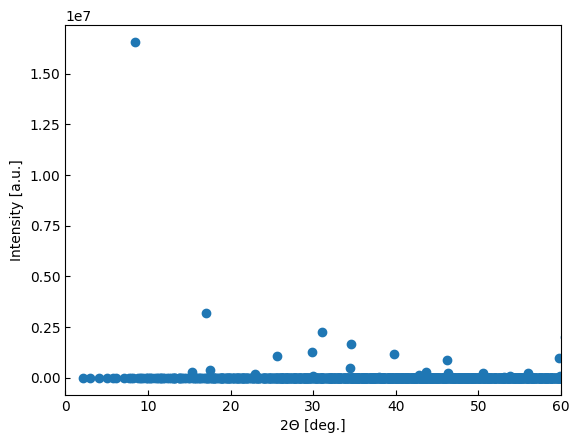

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

fig, ax = plt.subplots()

# PXRD 図をプロット
tth_list = []
inten_list = []
hkl_list = []
for tth in inten_dict:
    tth_list.append(tth)
    inten_list.append(inten_dict[tth][0])
    hkl_list.append(inten_dict[tth][1])
# print(tth_list)
print(len(inten_list))
print(len(hkl_list))

plt.scatter(tth_list, inten_list)

plt.xlim(tth_min, tth_max)
plt.xlabel("2Θ [deg.]")
plt.ylabel("Intensity [a.u.]")
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"



plt.show()

[0 0 0 0 2]
1784
[135, 136, 993]
17.033
[0 0 0 0 2]
[ 135  575  993 1422]


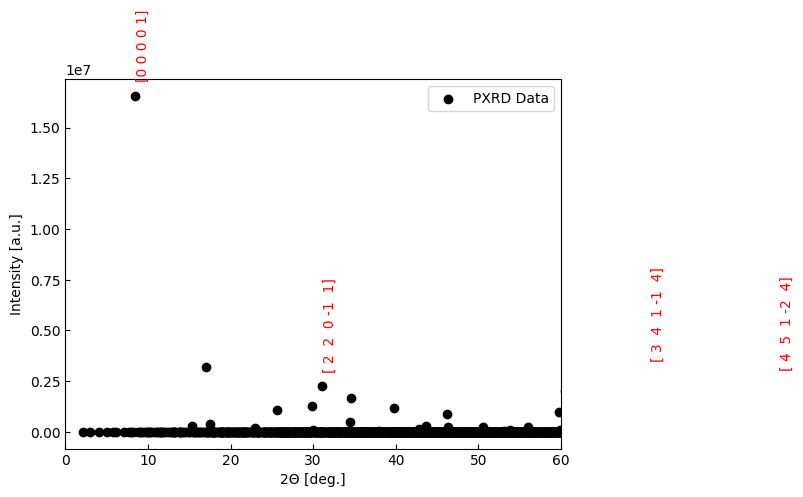

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

fig, ax = plt.subplots()

# PXRD 図をプロット
tth_list = []
inten_list = []
hkl_list = []
for tth in inten_dict:
    tth_list.append(tth)
    inten_list.append(inten_dict[tth][0])
    hkl_list.append(inten_dict[tth][1])

# print(tth_list)
print(hkl_list[136])
print(len(hkl_list))

indices = [i for i, value in enumerate(inten_list) if value >= 2500000]

print(indices)
print(tth_list[136])
print(hkl_list[136])

# 配列に変換
tth_array = np.array(tth_list)
inten_array = np.array(inten_list)
hkl_array = np.array(hkl_list)

# 強いピークを検出
# peaks, properties = find_peaks(inten_array, height=np.max(inten_array) * 0.05, prominence=0.001, width=1)  # 強度が最大値の30%以上
peaks, properties = find_peaks(inten_array, height=1000000)  # 強度が最大値の30%以上


# peaks, properties = find_peaks(
#     inten_array, 
#     # height=np.max(inten_array) * 0.01,  # 最大値の10%以上
#     prominence=0.00000001,  # 周囲との差が十分にあるピークを検出）
#     threshold=0.000000001,  # 隣接点との差が十分なピークのみ
#     width=0.00000000001,  # ノイズを排除
#     distance=1
# )
print(peaks)

# PXRD データを散布図で表示
plt.scatter(tth_list, inten_list, color='black', label="PXRD Data")

# ピークに hkl をラベル付け
for peak in peaks:
    tth = tth_array[peak]  # 2θ のピーク位置
    y = inten_array[peak]  # ピークの強度
    hkl = str(hkl_array[peak])  # hkl インデックス

    # plt.text(tth, y + 0.05 * np.max(inten_array), hkl, rotation=90, fontsize=10, color="red")  # ラベル表示
    plt.text(tth, y + 0.05 * np.max(inten_array) + np.random.uniform(-0.02, 0.02), hkl, rotation=90, fontsize=10, color="red")



# plt.xlim(min(tth_list), max(tth_list))
plt.xlim(tth_min, tth_max)
plt.xlabel("2Θ [deg.]")
plt.ylabel("Intensity [a.u.]")
plt.legend()
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

plt.show()

ValueError: `x` must be a 1-D array

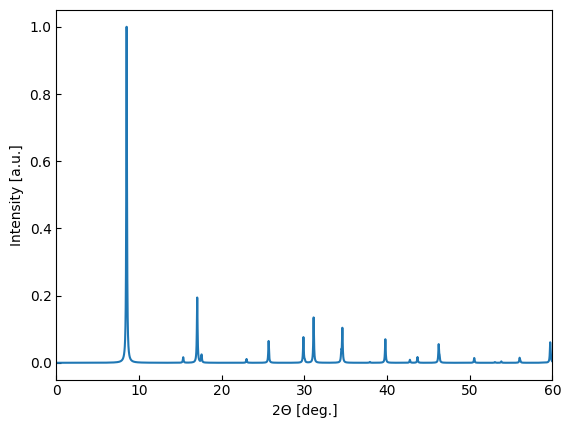

In [36]:
#plot scatter
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(data_num):
    plt.plot(tths,data_list[i])
plt.xlim(tth_min,tth_max)
plt.xlabel('2Θ [deg.]')
plt.ylabel('Intensity [a.u.]')
#plt.legend()
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# 強いピークを選択
intensities = data_list  # 1つ目のデータセットを基準にする
peaks, properties = find_peaks(intensities, height=np.max(intensities) * 0.3)  # 30%以上の強度のピーク

# ピークに hkl をラベル付け
for peak in peaks:
    tth = tths[peak]  # 2θ のピーク位置
    x = tth - 3  # ラベル位置調整
    y = intensities[peak]  # ピークの強度

    # hkl インデックスを取得
    if tth in inten_dict:
        hkl = str(abs(inten_dict[tth][1]))  # hkl の整数部分を取得
        plt.text(x, y + 0.05 * np.max(intensities), hkl, rotation=90, fontsize=10, color="red")  # ラベル表示


# for tth in inten_dict:
#     key = int((round(tth,2)-10)*100)
#     x = tth-3
#     y = vector
#     # y = inten_dict[tth][0]
#     # print(data_list[0])
#     # print(len(data_list[0]))
#     # print(inten_dict[tth][0])
#     # print(inten_dict[tth][1])
#     if y>=1.0:
#         y = vector-0.1
#     elif y<+0.1:
#         y = vector+0.02
#     hkl = str(abs(inten_dict[tth][1]))
#     # print(inten_dict[tth][1])
#     plt.text(x, y, hkl, rotation=90)
#     # print((x, y, hkl))


plt.show

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

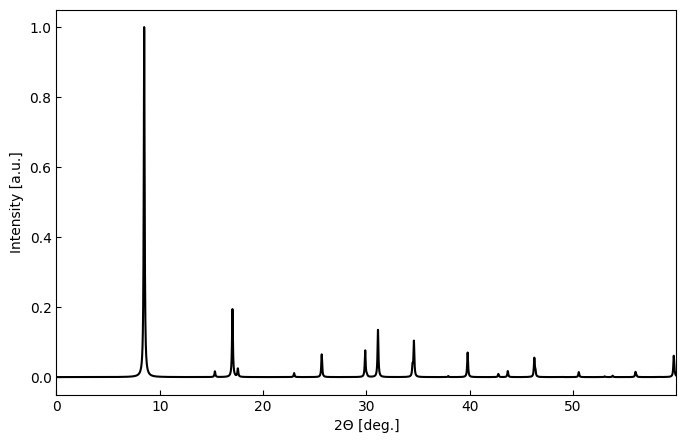

In [37]:
# PXRD データ
# tths = np.array(pattern.x)  # 2θ 角度
# intensities = np.array(pattern.y)  # 強度
ths = tths # 2θ 角度
intensities = data_list[0]  # 強度

# ピークの検出（高さが大きいものを対象）
peaks, _ = find_peaks(intensities, height=np.max(intensities) * 0.3)  # 30%以上の強度のピーク

# ========== PXRD 図の描画 ==========
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(tths, intensities, color="black", label="PXRD pattern")
plt.xlim(min(tths), max(tths))
plt.xlabel("2Θ [deg.]")
plt.ylabel("Intensity [a.u.]")

# hkl インデックスをピークに表示
# for peak in peaks:
#     hkl_list = pattern.hkls[peak]  # そのピークに対応する (hkl)
hkl_list = []
for tth in inten_dict:
    hkl = inten_dict[tth][1]
    hkl_list.append(hkl)
    hkl_text = f"{hkl_list[0]['hkl']}"  # 最も強いピークの (hkl) を取得
    plt.text(tths[peak], intensities[peak] + 5, hkl_text, ha='center', fontsize=10, color='blue')
print(hkl_list)

# 軸の設定
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.legend()
plt.show()

In [ ]:
#plot scatter
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(data_num):
    plt.plot(tths,data_list[i])
plt.xlim(tth_min,tth_max)
plt.xlabel('2Θ [deg.]')
plt.ylabel('Intensity [a.u.]')
#plt.legend()
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.show

for tth in inten_dict:
  key = int((round(tth,2)-10)*100)
  x = tth-3
  # y = vector[key]
  y = data_list[0]
  if y>=1.0:
    y = vector[key]-0.1
  elif y<+0.1:
    y = vector[key]+0.02
  hkl = str(abs(inten_dict[tth][1]))
  plt.text(x, y, hkl, rotation=90)
  # print((x, y, hkl))


plt.show